In [1]:
import random
import numpy as np

class GeneticAlgorithmKnapsack:
    def __init__(self, v, w, K, N=100, s=0.5, c=0.4, m=0.1, maxI=1000, alpha=1):
        self.v = np.array(v)  # Valores
        self.w = np.array(w)  # Pesos
        self.K = K            # Capacidad de la mochila
        self.N = N            # Tamaño de la población
        self.s = s            # Porcentaje de selección
        self.c = c            # Porcentaje de cruce
        self.m = m            # Porcentaje de mutación
        self.maxI = maxI      # Número máximo de iteraciones
        self.alpha = alpha    # Factor de penalización
        self.n_items = len(v) # Número de objetos
        self.population = []  # Población actual
        self.best_solution = None  # Mejor solución encontrada
        self.best_fitness = -np.inf

    def initialize_population(self):
        """Genera la población inicial."""
        self.population = []
        for _ in range(self.N):
            individual = np.random.randint(2, size=self.n_items)
            self.population.append(individual)

    def fitness(self, individual):
        """Calcula el fitness de un individuo."""
        total_value = np.sum(individual * self.v)
        total_weight = np.sum(individual * self.w)
        if total_weight <= self.K:
            return total_value
        else:
            return total_value - self.alpha * (total_weight - self.K)

    def evaluate_population(self):
        """Evalúa toda la población y actualiza el mejor individuo."""
        fitness_values = []
        for individual in self.population:
            fit = self.fitness(individual)
            fitness_values.append(fit)
            if fit > self.best_fitness:
                self.best_fitness = fit
                self.best_solution = individual.copy()
        return fitness_values

    def selection(self, fitness_values):
        """Selecciona individuos para la siguiente generación."""
        total_fitness = sum(fitness_values)
        selection_probs = [f / total_fitness for f in fitness_values]
        num_selected = int(self.s * self.N)
        selected_indices = np.random.choice(range(self.N), size=num_selected, p=selection_probs)
        selected = [self.population[i] for i in selected_indices]
        return selected

    def crossover(self, parents):
        """Aplica el operador de cruce para generar nuevos individuos."""
        num_offspring = int(self.c * self.N)
        offspring = []
        while len(offspring) < num_offspring:
            parent1, parent2 = random.sample(parents, 2)
            crossover_point = random.randint(1, self.n_items - 1)
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.extend([child1, child2])
        return offspring[:num_offspring]

    def mutation(self, individuals):
        """Aplica el operador de mutación a los individuos."""
        num_mutations = int(self.m * self.N)
        mutated = []
        for _ in range(num_mutations):
            individual = random.choice(individuals).copy()
            mutation_point = random.randint(0, self.n_items - 1)
            individual[mutation_point] = 1 - individual[mutation_point]  # Flip bit
            mutated.append(individual)
        return mutated

    def create_new_population(self, selected, offspring, mutated):
        """Crea la nueva población combinando los individuos."""
        self.population = selected + offspring + mutated
        # Si la población es mayor que N, recortar
        if len(self.population) > self.N:
            self.population = self.population[:self.N]

    def run(self):
        """Ejecuta el algoritmo genético."""
        self.initialize_population()
        for iteration in range(self.maxI):
            fitness_values = self.evaluate_population()
            selected = self.selection(fitness_values)
            offspring = self.crossover(selected)
            mutated = self.mutation(self.population)
            self.create_new_population(selected, offspring, mutated)
            # Opcional: Mostrar progreso
            if (iteration + 1) % 100 == 0 or iteration == 0:
                print(f"Iteración {iteration + 1}, Mejor fitness: {self.best_fitness}")
        return self.get_result()

    def get_result(self):
        """Devuelve la mejor solución encontrada."""
        selected_items = [i for i in range(self.n_items) if self.best_solution[i] == 1]
        total_value = np.sum(self.best_solution * self.v)
        total_weight = np.sum(self.best_solution * self.w)
        return {
            'selected_items': selected_items,
            'total_value': total_value,
            'total_weight': total_weight
        }


In [2]:
# Valores y pesos de los objetos
v = [60, 100, 120]
w = [10, 20, 30]
K = 50  # Capacidad de la mochila

# Parámetros del algoritmo genético
N = 100       # Tamaño de la población
s = 0.5       # Porcentaje de selección
c = 0.4       # Porcentaje de cruce
m = 0.1       # Porcentaje de mutación
maxI = 500    # Número máximo de iteraciones
alpha = 10    # Factor de penalización


In [3]:
# Crear una instancia del algoritmo genético
ga_knapsack = GeneticAlgorithmKnapsack(v, w, K, N, s, c, m, maxI, alpha)

# Ejecutar el algoritmo
result = ga_knapsack.run()

# Mostrar los resultados
print("\nMejor solución encontrada:")
print(f"Objetos seleccionados: {result['selected_items']}")
print(f"Valor total: {result['total_value']}")
print(f"Peso total: {result['total_weight']}")

Iteración 1, Mejor fitness: 220
Iteración 100, Mejor fitness: 220
Iteración 200, Mejor fitness: 220
Iteración 300, Mejor fitness: 220
Iteración 400, Mejor fitness: 220
Iteración 500, Mejor fitness: 220

Mejor solución encontrada:
Objetos seleccionados: [1, 2]
Valor total: 220
Peso total: 50


In [2]:
import random
import numpy as np

class GeneticAlgorithmKnapsack:
    def __init__(self, v, w, K, N=100, s=0.5, c=0.4, m=0.1, maxI=1000, alpha=1):
        self.v = np.array(v)  # Valores
        self.w = np.array(w)  # Pesos
        self.K = K            # Capacidad de la mochila
        self.N = N            # Tamaño de la población
        self.s = s            # Porcentaje de selección
        self.c = c            # Porcentaje de cruce
        self.m = m            # Porcentaje de mutación
        self.maxI = maxI      # Número máximo de iteraciones
        self.alpha = alpha    # Factor de penalización
        self.n_items = len(v) # Número de objetos
        self.population = []  # Población actual
        self.best_solution = None  # Mejor solución encontrada
        self.best_fitness = -np.inf

    def initialize_population(self):
        """Genera la población inicial."""
        self.population = []
        for _ in range(self.N):
            individual = np.random.randint(2, size=self.n_items)
            self.population.append(individual)

    def fitness(self, individual):
        """Calcula el fitness de un individuo."""
        total_value = np.sum(individual * self.v)
        total_weight = np.sum(individual * self.w)
        if total_weight <= self.K:
            return total_value
        else:
            return total_value - self.alpha * (total_weight - self.K)

    def evaluate_population(self):
        """Evalúa toda la población y actualiza el mejor individuo."""
        fitness_values = []
        for individual in self.population:
            fit = self.fitness(individual)
            fitness_values.append(max(0, fit))  # Asegura que los valores de fitness no sean negativos
            if fit > self.best_fitness:
                self.best_fitness = fit
                self.best_solution = individual.copy()
        return fitness_values

    def selection(self, fitness_values):
        """Selecciona individuos para la siguiente generación."""
        total_fitness = sum(fitness_values)
        if total_fitness == 0:
            selection_probs = [1 / len(fitness_values) for _ in fitness_values]  # Si toda la población tiene fitness 0
        else:
            selection_probs = [f / total_fitness for f in fitness_values]
        
        num_selected = int(self.s * self.N)
        selected_indices = np.random.choice(range(self.N), size=num_selected, p=selection_probs)
        selected = [self.population[i] for i in selected_indices]
        return selected

    def crossover(self, parents):
        """Aplica el operador de cruce para generar nuevos individuos."""
        num_offspring = int(self.c * self.N)
        offspring = []
        while len(offspring) < num_offspring:
            parent1, parent2 = random.sample(parents, 2)
            crossover_point = random.randint(1, self.n_items - 1)
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.extend([child1, child2])
        return offspring[:num_offspring]

    def mutation(self, individuals):
        """Aplica el operador de mutación a los individuos."""
        num_mutations = int(self.m * self.N)
        mutated = []
        for _ in range(num_mutations):
            individual = random.choice(individuals).copy()
            mutation_point = random.randint(0, self.n_items - 1)
            individual[mutation_point] = 1 - individual[mutation_point]  # Flip bit
            mutated.append(individual)
        return mutated

    def create_new_population(self, selected, offspring, mutated):
        """Crea la nueva población combinando los individuos."""
        self.population = selected + offspring + mutated
        # Si la población es mayor que N, recortar
        if len(self.population) > self.N:
            self.population = self.population[:self.N]

    def run(self):
        """Ejecuta el algoritmo genético."""
        self.initialize_population()
        for iteration in range(self.maxI):
            fitness_values = self.evaluate_population()
            selected = self.selection(fitness_values)
            offspring = self.crossover(selected)
            mutated = self.mutation(self.population)
            self.create_new_population(selected, offspring, mutated)
            # Opcional: Mostrar progreso
            if (iteration + 1) % 100 == 0 or iteration == 0:
                print(f"Iteración {iteration + 1}, Mejor fitness: {self.best_fitness}")
        return self.get_result()

    def get_result(self):
        """Devuelve la mejor solución encontrada."""
        selected_items = [i for i in range(self.n_items) if self.best_solution[i] == 1]
        total_value = np.sum(self.best_solution * self.v)
        total_weight = np.sum(self.best_solution * self.w)
        return {
            'selected_items': selected_items,
            'total_value': total_value,
            'total_weight': total_weight
        }

# Valores y pesos de los objetos
v = [10, 12, 8, 5, 8, 5, 6, 7, 6, 12, 8, 8, 10, 9, 8, 3, 7, 8, 5, 6]
w = [6, 7, 7, 3, 5, 2, 4, 5, 3, 9, 8, 7, 8, 6, 5, 2, 3, 5, 4, 6]
K = 50  # Capacidad de la mochila

# Parámetros del algoritmo genético
N = 100       # Tamaño de la población
s = 0.5       # Porcentaje de selección
c = 0.4       # Porcentaje de cruce
m = 0.1       # Porcentaje de mutación
maxI = 1000   # Número máximo de iteraciones
alpha = 10    # Factor de penalización

# Crear una instancia del algoritmo genético
ga_knapsack = GeneticAlgorithmKnapsack(v, w, K, N, s, c, m, maxI, alpha)

# Ejecutar el algoritmo
result = ga_knapsack.run()

# Mostrar los resultados
print("\nMejor solución encontrada:")
print(f"Objetos seleccionados: {result['selected_items']}")
print(f"Valor total: {result['total_value']}")
print(f"Peso total: {result['total_weight']}")


Iteración 1, Mejor fitness: 77
Iteración 100, Mejor fitness: 80
Iteración 200, Mejor fitness: 84
Iteración 300, Mejor fitness: 84
Iteración 400, Mejor fitness: 85
Iteración 500, Mejor fitness: 85
Iteración 600, Mejor fitness: 85
Iteración 700, Mejor fitness: 85
Iteración 800, Mejor fitness: 85
Iteración 900, Mejor fitness: 85
Iteración 1000, Mejor fitness: 85

Mejor solución encontrada:
Objetos seleccionados: [0, 1, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17]
Valor total: 85
Peso total: 50


Solución por Programación Lineal:
Objetos seleccionados: [1, 2]
Valor total: 220
Peso total: 50
Solución por Algoritmo Genético:
Objetos seleccionados: [0, 1, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17]
Valor total: 85
Peso total: 50
Comparación:
Valor total: La solución de la programación lineal es significativamente mejor, con un valor total de 220, comparado con el valor total de 85 obtenido por el algoritmo genético. Esto sugiere que la programación lineal ha encontrado una solución óptima con un mayor beneficio.

Peso total: En ambos casos, el peso total de los objetos seleccionados es el mismo (50), lo que significa que ambos métodos respetan la restricción de capacidad de la mochila.

Análisis:
¿Es la misma solución?: No, las soluciones no son iguales. Los objetos seleccionados son diferentes en cada método.

¿Es mejor o peor?: La solución obtenida por programación lineal es claramente mejor en términos del valor total obtenido (220 frente a 85). Esto sugiere que el algoritmo genético no alcanzó la solución óptima en este caso.

Razón de la diferencia:
Los algoritmos genéticos no siempre garantizan la mejor solución óptima, ya que son métodos heurísticos. Pueden encontrar soluciones subóptimas, especialmente si no se configuran adecuadamente o si se requiere un número mayor de iteraciones. Por otro lado, la programación lineal, cuando puede aplicarse, garantiza una solución óptima bajo las restricciones establecidas.

## 3. TSP

In [2]:
import numpy as np
from typing import List, Tuple
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import matplotlib.animation as animation

In [3]:
class GeneticTSP:
    def __init__(self, population_size: int = 100, 
                generations: int = 1000,
                mutation_rate: float = 0.01,
                elite_size: int = 10):
        """
        Inicializa el algoritmo genético para TSP
        
        Args:
            population_size: Tamaño de la población
            generations: Número de generaciones
            mutation_rate: Tasa de mutación
            elite_size: Número de mejores individuos que pasan directamente a la siguiente generación
        """
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
        self.best_solutions_history = []


    def _calculate_distance(self, city1: Tuple[float, float], 
                          city2: Tuple[float, float]) -> float:
        """Calcula la distancia euclidiana entre dos ciudades"""
        return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)
    
    def _calculate_tour_distance(self, tour: List[int], 
                               cities: List[Tuple[float, float]]) -> float:
        """Calcula la distancia total de un tour"""
        distance = 0
        for i in range(len(tour)):
            from_city = cities[tour[i]]
            to_city = cities[tour[(i + 1) % len(tour)]]
            distance += self._calculate_distance(from_city, to_city)
        return distance
    
    def _create_initial_population(self, num_cities: int) -> List[List[int]]:
        """Crea una población inicial de tours aleatorios"""
        population = []
        for _ in range(self.population_size):
            tour = list(range(num_cities))
            random.shuffle(tour)
            population.append(tour)
        return population
    
    def _select_parent(self, fitness_scores: List[float]) -> List[int]:
        """Selecciona un padre usando selección por torneo"""
        tournament_size = 5
        tournament = random.sample(range(len(fitness_scores)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament]
        return tournament[tournament_fitness.index(min(tournament_fitness))]
    
    def _crossover(self, parent1: List[int], parent2: List[int]) -> List[int]:
        """Realiza el cruce ordenado (OX) entre dos padres"""
        size = len(parent1)
        start, end = sorted(random.sample(range(size), 2))
        
        # Obtener la subsecuencia del primer padre
        child = [-1] * size
        for i in range(start, end + 1):
            child[i] = parent1[i]
        
        # Completar con los elementos del segundo padre
        remaining = [x for x in parent2 if x not in child[start:end+1]]
        j = 0
        for i in range(size):
            if child[i] == -1:
                child[i] = remaining[j]
                j += 1
                
        return child
    
    def _mutate(self, tour: List[int]) -> List[int]:
        """Aplica mutación por intercambio si se cumple la probabilidad"""
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(len(tour)), 2)
            tour[i], tour[j] = tour[j], tour[i]
        return tour
    
    def solve(self, cities: List[Tuple[float, float]]) -> Tuple[List[int], float]:
        """
        Resuelve el problema TSP usando algoritmo genético
        
        Args:
            cities: Lista de tuplas con las coordenadas (x, y) de cada ciudad
            
        Returns:
            Tuple[List[int], float]: Mejor tour encontrado y su distancia
        """
        num_cities = len(cities)
        population = self._create_initial_population(num_cities)
        best_distance = float('inf')
        best_tour = None
        progress = []

        for generation in range(self.generations):
            fitness_scores = [self._calculate_tour_distance(tour, cities) 
                            for tour in population]
            
            min_distance = min(fitness_scores)
            if min_distance < best_distance:
                best_distance = min_distance
                best_tour = population[fitness_scores.index(min_distance)].copy()
            
            progress.append(best_distance)

            # Guardar la mejor solución cada 10 generaciones
            if generation % 10 == 0:
                self.best_solutions_history.append((best_tour.copy(), best_distance))
            
            sorted_population = [x for _, x in sorted(zip(fitness_scores, population))]
            new_population = sorted_population[:self.elite_size]
            
            while len(new_population) < self.population_size:
                parent1 = population[self._select_parent(fitness_scores)]
                parent2 = population[self._select_parent(fitness_scores)]
                child = self._crossover(parent1, parent2)
                child = self._mutate(child)
                new_population.append(child)
            
            population = new_population
            
            if (generation + 1) % 100 == 0:
                print(f"Generación {generation + 1}: Mejor distancia = {best_distance:.2f}")
        


        
        # Asegurarse de guardar la mejor solución final
        self.best_solutions_history.append((best_tour, best_distance))
        return best_tour, best_distance, progress

def create_tsp_animation(cities: List[Tuple[float, float]], 
                        solution_history: List[Tuple[List[int], float]], 
                        output_file: str = 'tsp_evolution.gif'):
    """
    Crea una animación GIF de la evolución del algoritmo
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    coords = np.array(cities)
    
    def update(frame):
        ax.clear()
        tour, distance = solution_history[frame]
        
        # Dibujar ciudades
        ax.scatter(coords[:, 0], coords[:, 1], c='red', marker='o')
        
        # Dibujar tour
        for i in range(len(tour)):
            start = coords[tour[i]]
            end = coords[tour[(i + 1) % len(tour)]]
            ax.plot([start[0], end[0]], [start[1], end[1]], 'b-', alpha=0.3)
        
        ax.set_title(f'Generación {frame*10}\nDistancia: {distance:.2f}')
        ax.grid(True)
    
    # Crear la animación
    anim = FuncAnimation(
        fig, 
        update, 
        frames=len(solution_history),
        interval=30,  # 200ms entre frames
        repeat=True
    )
    
    # Guardar como GIF
    anim.save(output_file, writer='pillow')
    plt.close()
    
    return anim

def save_final_solution_plot(cities: List[Tuple[float, float]], 
                          best_tour: List[int],
                          best_distance: float,
                          output_file: str = 'best_solution.png'):
    """
    Guarda una imagen de la mejor solución encontrada
    """
    plt.figure(figsize=(10, 10))
    coords = np.array(cities)
    
    # Dibujar ciudades
    plt.scatter(coords[:, 0], coords[:, 1], c='red', marker='o')
    
    # Dibujar mejor tour
    for i in range(len(best_tour)):
        start = coords[best_tour[i]]
        end = coords[best_tour[(i + 1) % len(best_tour)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-', alpha=0.3)
    
    plt.title(f'Mejor solución encontrada\nDistancia total: {best_distance:.2f}')
    plt.grid(True)
    plt.savefig(output_file)
    plt.close()

# Función para leer el archivo ch150.tsp
def read_tsp_file(filename: str) -> List[Tuple[float, float]]:
    """Lee el archivo TSP y devuelve lista de coordenadas"""
    cities = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        # Saltar el encabezado
        start_reading = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start_reading = True
                continue
            if line.strip() == "EOF":
                break
            if start_reading:
                _, x, y = line.strip().split()
                cities.append((float(x), float(y)))
    return cities


In [6]:
# Leer datos
cities = read_tsp_file("ch150.tsp")

# Configurar y ejecutar el algoritmo genético
ga_tsp = GeneticTSP(
    population_size=150,
    generations=20000,
    mutation_rate=0.15,
    elite_size=3
)

best_tour, best_distance, progress = ga_tsp.solve(cities)

print(f"\nMejor tour encontrado:")
print(f"Distancia total: {best_distance:.2f}")
print(f"Ruta: {best_tour}")



Generación 100: Mejor distancia = 23401.45
Generación 200: Mejor distancia = 19416.77
Generación 300: Mejor distancia = 17063.70
Generación 400: Mejor distancia = 15527.89
Generación 500: Mejor distancia = 15023.76
Generación 600: Mejor distancia = 13929.09
Generación 700: Mejor distancia = 13079.66
Generación 800: Mejor distancia = 12763.56
Generación 900: Mejor distancia = 12556.65
Generación 1000: Mejor distancia = 12491.61
Generación 1100: Mejor distancia = 12429.74
Generación 1200: Mejor distancia = 12134.43
Generación 1300: Mejor distancia = 11945.20
Generación 1400: Mejor distancia = 11838.32
Generación 1500: Mejor distancia = 11800.40
Generación 1600: Mejor distancia = 11673.48
Generación 1700: Mejor distancia = 11453.26
Generación 1800: Mejor distancia = 11082.67
Generación 1900: Mejor distancia = 10761.91
Generación 2000: Mejor distancia = 10561.83
Generación 2100: Mejor distancia = 10480.71
Generación 2200: Mejor distancia = 10471.93
Generación 2300: Mejor distancia = 10465.

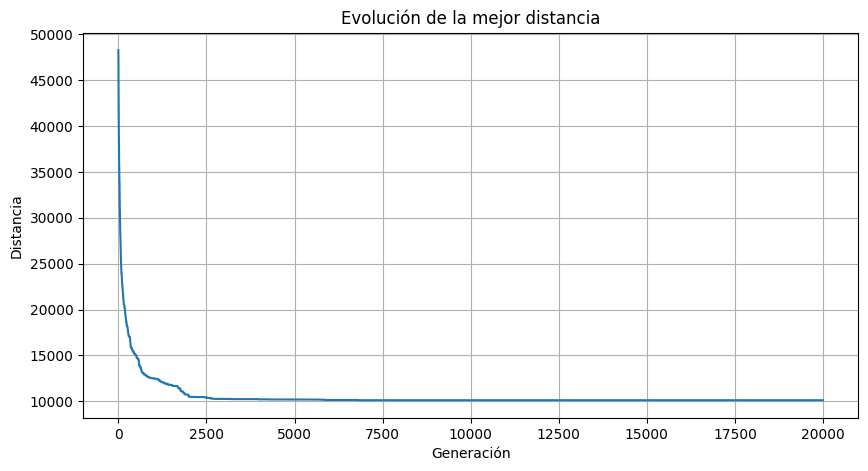

In [18]:
# Graficar progreso
plt.figure(figsize=(10, 5))
plt.plot(progress)
plt.title('Evolución de la mejor distancia')
plt.xlabel('Generación')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()


In [7]:
# Guardar el gif del histórico de soluciones
create_tsp_animation(cities, ga_tsp.best_solutions_history, 'tsp_evolution.gif')
print("Animación guardada en tsp_evolution.gif")

# Visualizar la mejor ruta
save_final_solution_plot(cities, best_tour, best_distance, 'best_solution.png')
print("Mejor solución guardada en best_solution.png")


Animación guardada en tsp_evolution.gif
Mejor solución guardada en best_solution.png


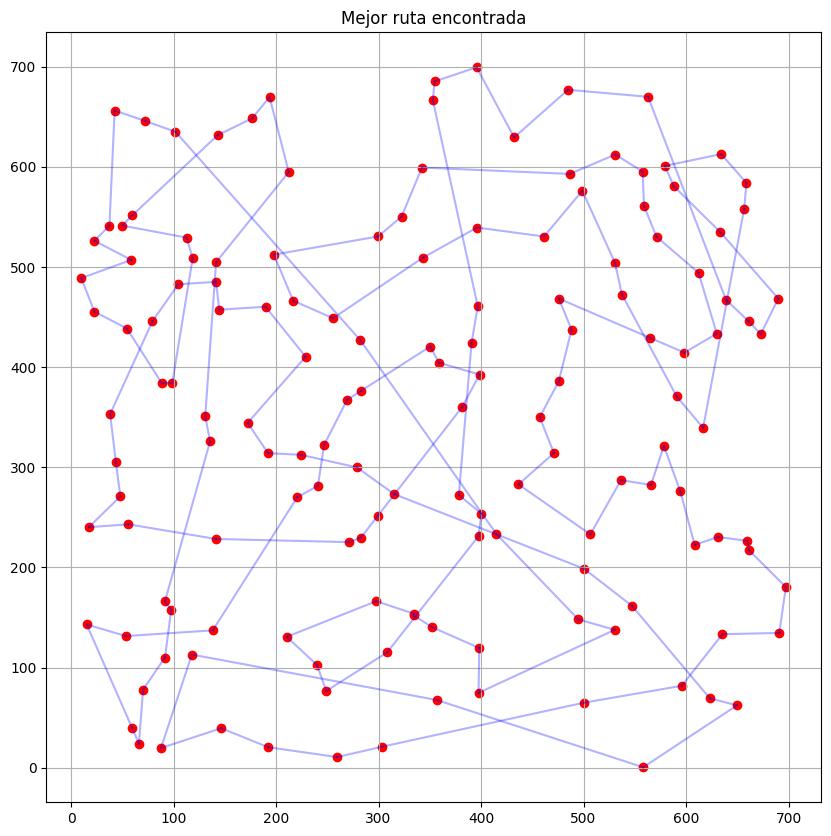

In [14]:

# Guardar la imagen de la mejor solución
plt.figure(figsize=(10, 10))
coords = np.array(cities)
plt.scatter(coords[:, 0], coords[:, 1], c='red', marker='o')

# Dibujar el tour
for i in range(len(best_tour)):
    start = coords[best_tour[i]]
    end = coords[best_tour[(i + 1) % len(best_tour)]]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'b-', alpha=0.3)

plt.title('Mejor ruta encontrada')
plt.grid(True)
plt.show()

In [10]:
print(f"Distancia total: {best_distance:.2f}")


Distancia total: 10121.83


### Segundo intento con otros parámetros

In [13]:

# Configurar y ejecutar el algoritmo genético
ga_tsp1 = GeneticTSP(
    population_size=200,
    generations=15000,
    mutation_rate=0.05,
    elite_size=10
)


best_tour1, best_distance1, progress1 = ga_tsp1.solve(cities)

print(f"\nMejor tour encontrado:")
print(f"Distancia total: {best_distance1:.2f}")
print(f"Ruta: {best_tour1}")



Generación 100: Mejor distancia = 24099.29
Generación 200: Mejor distancia = 19848.66
Generación 300: Mejor distancia = 18302.77
Generación 400: Mejor distancia = 17111.40
Generación 500: Mejor distancia = 16256.15
Generación 600: Mejor distancia = 15286.92
Generación 700: Mejor distancia = 15065.09
Generación 800: Mejor distancia = 14783.10
Generación 900: Mejor distancia = 14560.79
Generación 1000: Mejor distancia = 14474.33
Generación 1100: Mejor distancia = 14424.84
Generación 1200: Mejor distancia = 14232.96
Generación 1300: Mejor distancia = 14084.81
Generación 1400: Mejor distancia = 13770.32
Generación 1500: Mejor distancia = 13736.45
Generación 1600: Mejor distancia = 13726.93
Generación 1700: Mejor distancia = 13603.67
Generación 1800: Mejor distancia = 13583.04
Generación 1900: Mejor distancia = 13329.67
Generación 2000: Mejor distancia = 13314.95
Generación 2100: Mejor distancia = 13220.13
Generación 2200: Mejor distancia = 13150.72
Generación 2300: Mejor distancia = 13137.